In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#import SAT scores
df_scores = pd.read_csv('scores.csv')

In [4]:
#what are my columns?
df_scores.columns

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested'],
      dtype='object')

In [5]:
#rename every column with spaces and replace with an underscore
df_scores.columns = df_scores.columns.str.replace(" ", "_")

In [6]:
#what are the data types in my dataframe?
df_scores.dtypes

School_ID                       object
School_Name                     object
Borough                         object
Building_Code                   object
Street_Address                  object
City                            object
State                           object
Zip_Code                         int64
Latitude                       float64
Longitude                      float64
Phone_Number                    object
Start_Time                      object
End_Time                        object
Student_Enrollment             float64
Percent_White                   object
Percent_Black                   object
Percent_Hispanic                object
Percent_Asian                   object
Average_Score_(SAT_Math)       float64
Average_Score_(SAT_Reading)    float64
Average_Score_(SAT_Writing)    float64
Percent_Tested                  object
dtype: object

In [7]:
df_scores.head()

,School_ID,School_Name,Borough,Building_Code,Street_Address,City,State,Zip_Code,Latitude,Longitude,...,End_Time,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Average_Score_(SAT_Math),Average_Score_(SAT_Reading),Average_Score_(SAT_Writing),Percent_Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [8]:
#show all column names (currently truncated)
pd.set_option('display.max_columns', None)

In [9]:
#remove the % from dataframe values as the dtype is currently casted as an object/string
df_scores = df_scores.replace('%','',regex=True)

In [10]:
#typecast the string values for the percent ethnictities into a float. 
df_scores['Percent_White'] = df_scores['Percent_White'].astype(float)
df_scores['Percent_Black'] = df_scores['Percent_Black'].astype(float)
df_scores['Percent_Hispanic'] = df_scores['Percent_Hispanic'].astype(float)
df_scores['Percent_Asian'] = df_scores['Percent_Asian'].astype(float)

#typecast the string values for the percent tested into a float. 
df_scores['Percent_Tested'] = df_scores['Percent_Tested'].astype(float)

In [11]:
#double check and see dtypes for % etnicities
df_scores.dtypes

School_ID                       object
School_Name                     object
Borough                         object
Building_Code                   object
Street_Address                  object
City                            object
State                           object
Zip_Code                         int64
Latitude                       float64
Longitude                      float64
Phone_Number                    object
Start_Time                      object
End_Time                        object
Student_Enrollment             float64
Percent_White                  float64
Percent_Black                  float64
Percent_Hispanic               float64
Percent_Asian                  float64
Average_Score_(SAT_Math)       float64
Average_Score_(SAT_Reading)    float64
Average_Score_(SAT_Writing)    float64
Percent_Tested                 float64
dtype: object

In [55]:
#how many schools are in each borough? using value_counts() 
df_scores['Borough'].value_counts()

Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: Borough, dtype: int64

In [57]:
#percent breakdown of schools in each borough
df_scores['Borough'].value_counts(normalize= True)

Brooklyn         0.278161
Bronx            0.271264
Manhattan        0.243678
Queens           0.183908
Staten Island    0.022989
Name: Borough, dtype: float64

In [12]:
#general understanding of data
df_scores.describe()

,Zip_Code,Latitude,Longitude,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Average_Score_(SAT_Math),Average_Score_(SAT_Reading),Average_Score_(SAT_Writing),Percent_Tested
count,435.000000,435.000000,435.000000,428.000000,428.000000,428.000000,428.000000,428.000000,375.000000,375.000000,375.000000,386.000000
mean,10726.096552,40.745472,-73.921072,702.357477,8.310748,35.307243,44.312383,10.165654,432.944000,424.504000,418.458667,63.347150
std,537.927907,0.080937,0.071705,759.176061,12.832082,25.003716,24.291878,13.967923,71.952373,61.881069,64.548599,20.542348
min,10001.000000,40.528230,-74.192150,62.000000,0.000000,0.000000,2.600000,0.000000,317.000000,302.000000,284.000000,0.000000
25%,10301.500000,40.690495,-73.979260,357.250000,1.300000,17.100000,21.775000,1.600000,386.000000,386.000000,382.000000,49.275000
50%,10472.000000,40.741210,-73.925140,466.000000,2.650000,28.650000,45.550000,4.250000,415.000000,413.000000,403.000000,63.300000
75%,11217.000000,40.822095,-73.882580,623.250000,9.000000,48.150000,63.425000,11.375000,458.500000,445.000000,437.500000,78.900000
max,11694.000000,40.888370,-73.726910,5447.000000,79.900000,94.100000,100.000000,88.900000,754.000000,697.000000,693.000000,100.000000


In [13]:
#creates a filter for school name; lets check my high school 
filt = (df_scores['School_Name'] == 'Francis Lewis High School')

In [14]:
df_scores[filt]

,School_ID,School_Name,Borough,Building_Code,Street_Address,City,State,Zip_Code,Latitude,Longitude,Phone_Number,Start_Time,End_Time,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Average_Score_(SAT_Math),Average_Score_(SAT_Reading),Average_Score_(SAT_Writing),Percent_Tested
381,26Q430,Francis Lewis High School,Queens,Q430,58-20 Utopia Parkway,Fresh Meadows,NY,11365,40.74056,-73.79285,718-281-8200,8:30 AM,3:15 PM,4172.0,14.9,7.4,23.1,53.9,562.0,483.0,485.0,80.7


In [15]:
#general understanding of scores
df_scores['Average_Score_(SAT_Math)'].describe()

count    375.000000
mean     432.944000
std       71.952373
min      317.000000
25%      386.000000
50%      415.000000
75%      458.500000
max      754.000000
Name: Average_Score_(SAT_Math), dtype: float64

In [16]:
#general understanding of scores
df_scores['Average_Score_(SAT_Reading)'].describe()

count    375.000000
mean     424.504000
std       61.881069
min      302.000000
25%      386.000000
50%      413.000000
75%      445.000000
max      697.000000
Name: Average_Score_(SAT_Reading), dtype: float64

In [17]:
#general understanding of scores
df_scores['Average_Score_(SAT_Writing)'].describe()

count    375.000000
mean     418.458667
std       64.548599
min      284.000000
25%      382.000000
50%      403.000000
75%      437.500000
max      693.000000
Name: Average_Score_(SAT_Writing), dtype: float64

/Users/eric/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average_Score_(SAT_Math)', ylabel='Density'>

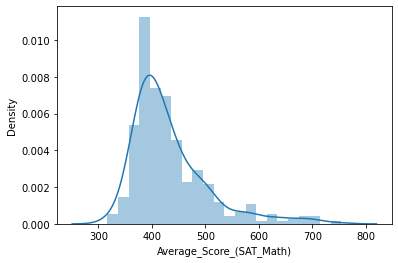

In [18]:
#distribution of Math scores
sns.distplot(df_scores['Average_Score_(SAT_Math)'])

/Users/eric/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average_Score_(SAT_Reading)', ylabel='Density'>

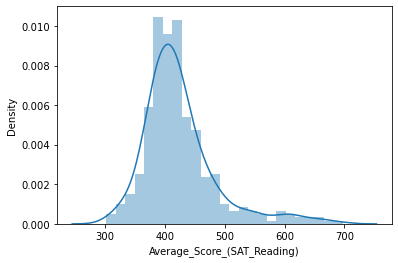

In [19]:
sns.distplot(df_scores['Average_Score_(SAT_Reading)'])

/Users/eric/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average_Score_(SAT_Writing)', ylabel='Density'>

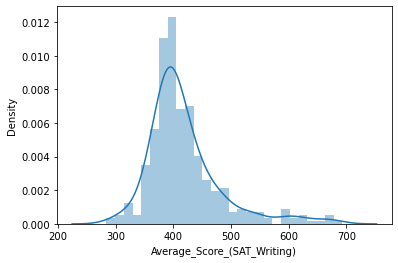

In [20]:
sns.distplot(df_scores['Average_Score_(SAT_Writing)'])

In [21]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df_scores['Average_Score_(SAT_Math)'].skew())
print("Kurtosis: %f" % df_scores['Average_Score_(SAT_Math)'].kurt())

Skewness: 1.724965
Kurtosis: 3.473252


In [22]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df_scores['Average_Score_(SAT_Reading)'].skew())
print("Kurtosis: %f" % df_scores['Average_Score_(SAT_Reading)'].kurt())

Skewness: 1.630577
Kurtosis: 3.649426


In [23]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df_scores['Average_Score_(SAT_Writing)'].skew())
print("Kurtosis: %f" % df_scores['Average_Score_(SAT_Writing)'].kurt())

Skewness: 1.683329
Kurtosis: 3.768382


Skewness is a measure of symmetry of the distribution. All three (3) scores are right-handed or positively skewed.  

Higher the kurtosis, data sets tend to have longer tails and implies more outliers are present in the dataset. 

In [24]:
#create new column with total average SAT score by adding all other scores
df_scores['Total_Average_Score'] = df_scores['Average_Score_(SAT_Math)'] + df_scores['Average_Score_(SAT_Reading)'] + df_scores['Average_Score_(SAT_Writing)']
df_scores.tail()

,School_ID,School_Name,Borough,Building_Code,Street_Address,City,State,Zip_Code,Latitude,Longitude,Phone_Number,Start_Time,End_Time,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Average_Score_(SAT_Math),Average_Score_(SAT_Reading),Average_Score_(SAT_Writing),Percent_Tested,Total_Average_Score
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,718-868-2978,7:45 AM,4:10 PM,381.0,2.1,49.1,43.6,4.2,372.0,362.0,352.0,44.6,1086.0
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,718-734-3280,8:45 AM,3:30 PM,368.0,14.7,46.7,30.2,3.5,357.0,381.0,376.0,38.5,1114.0
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,718-634-1970,8:15 AM,3:04 PM,683.0,10.7,53.2,29.1,6.0,427.0,430.0,423.0,76.6,1280.0
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,718-734-3290,8:30 AM,4:20 PM,397.0,3.8,52.6,33.5,5.0,399.0,403.0,405.0,46.5,1207.0
434,27Q323,Scholars' Academy,Queens,Q180,320 Beach 104th Street,Rockaway Park,NY,11694,40.58413,-73.82568,718-474-6918,8:45 AM,3:00 PM,1302.0,34.7,22.7,19.6,21.4,588.0,560.0,568.0,99.2,1716.0


In [25]:
#what are my descriptive statistics for total average scores?
df_scores['Total_Average_Score'].describe()

count     375.000000
mean     1275.906667
std       194.906283
min       924.000000
25%      1157.000000
50%      1226.000000
75%      1330.500000
max      2144.000000
Name: Total_Average_Score, dtype: float64

In [50]:
#what is the median total average score?
print('The median total average SAT score is', df_scores['Total_Average_Score'].median())

The median total average SAT score is 1226.0


/Users/eric/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Average_Score', ylabel='Density'>

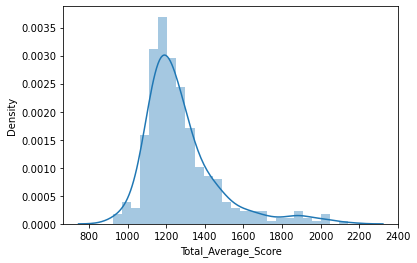

In [26]:
#distribution of total average score
sns.distplot(df_scores['Total_Average_Score'])

In [27]:
print("Skewness: %f" % df_scores['Total_Average_Score'].skew())
print("Kurtosis: %f" % df_scores['Total_Average_Score'].kurt())

Skewness: 1.760698
Kurtosis: 3.828119


Similarly, we see that the distribution of the 'Total Average Score' is also right-handed or positively skewed. 

## Schools with Highest and Lowest Total Average SAT Score

In [28]:
#schools with lowest and highest average SAT scores
print("The lowest average SAT score was", df_scores['Total_Average_Score'].min())
print("The highest average SAT score was", df_scores['Total_Average_Score'].max())

The lowest average SAT score was 924.0
The highest average SAT score was 2144.0


In [29]:
#create filters
lowest = (df_scores['Total_Average_Score'] == 924)
highest = (df_scores['Total_Average_Score'] == 2144)

In [30]:
print("The school with the lowest average SAT score is", df_scores.loc[df_scores['Total_Average_Score'] == 924, 'School_Name'])

print("The school with the highest average SAT score is", df_scores.loc[df_scores['Total_Average_Score'] == 2144, 'School_Name'])


The school with the lowest average SAT score is 217    Pan American International High School at Monroe
Name: School_Name, dtype: object
The school with the highest average SAT score is 105    Stuyvesant High School
Name: School_Name, dtype: object


In [47]:
#top 5 schools with the highest average SAT Score
df_scores.sort_values(by=['Total_Average_Score'], ascending = False, inplace = True)
df_scores[['Total_Average_Score', 'School_Name','Zip_Code', 'Borough']].head(5)

,Total_Average_Score,School_Name,Zip_Code,Borough
105,2144.0,Stuyvesant High School,10282,Manhattan
110,2041.0,Staten Island Technical High School,10306,Staten Island
203,2041.0,Bronx High School of Science,10468,Bronx
208,2013.0,High School of American Studies at Lehman College,10468,Bronx
385,1981.0,Townsend Harris High School,11367,Queens


In [46]:
#bottom 5 schools with the lowest average SAT Score
df_scores.sort_values(by=['Total_Average_Score'], ascending = True, inplace = True)
df_scores[['Total_Average_Score', 'School_Name', 'Zip_Code', 'Borough']].head(5)

,Total_Average_Score,School_Name,Zip_Code,Borough
217,924.0,Pan American International High School at Monroe,10472,Bronx
289,926.0,Multicultural High School,11208,Brooklyn
342,946.0,International High School at Prospect Heights,11225,Brooklyn
389,978.0,Pan American International High School,11373,Queens
204,987.0,Kingsbridge International High School,10468,Bronx


## Relationship Between Test Scores and Student Ethnicities

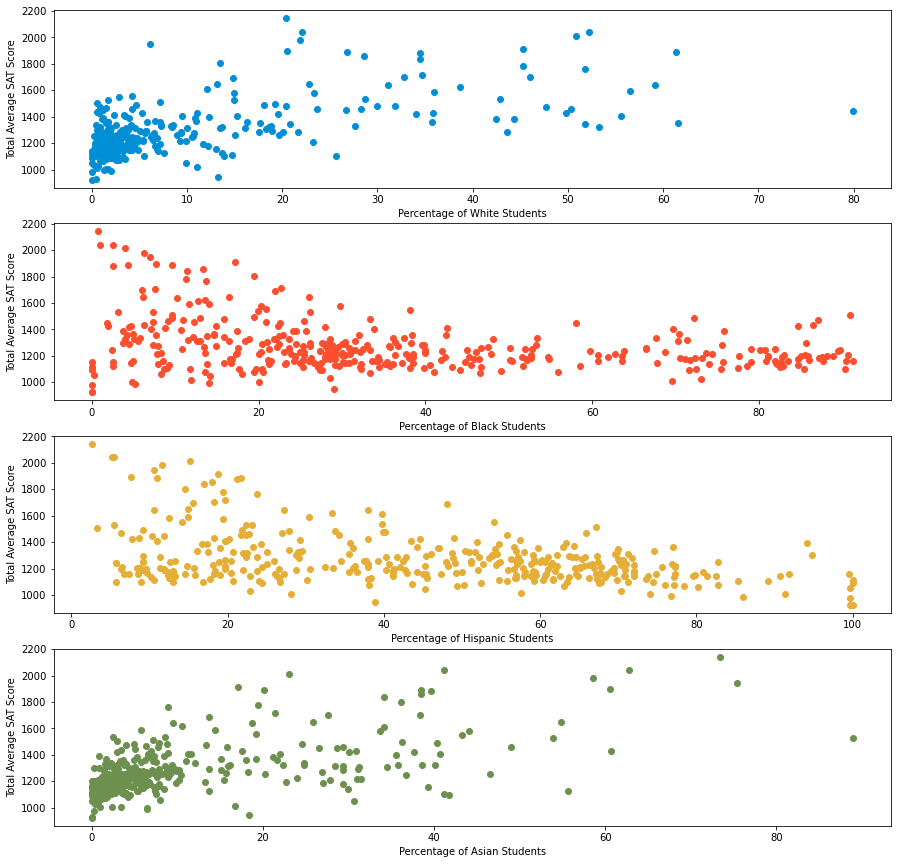

In [31]:
#graph relationship between test scores and % ethnicity

fig, ax = plt.subplots(4, figsize=(15, 15))
ax[0].scatter(x = df_scores['Percent_White'], y = df_scores['Total_Average_Score'], color = '#008fd5')
ax[0].set_xlabel("Percentage of White Students")
ax[0].set_ylabel("Total Average SAT Score")

ax[1].scatter(x = df_scores['Percent_Black'], y = df_scores['Total_Average_Score'], color = '#fc4f30')
ax[1].set_xlabel("Percentage of Black Students")
ax[1].set_ylabel("Total Average SAT Score")

ax[2].scatter(x = df_scores['Percent_Hispanic'], y = df_scores['Total_Average_Score'], color = '#e5ae37')
ax[2].set_xlabel("Percentage of Hispanic Students")
ax[2].set_ylabel("Total Average SAT Score")

ax[3].scatter(x = df_scores['Percent_Asian'], y = df_scores['Total_Average_Score'], color = '#6d904f')
ax[3].set_xlabel("Percentage of Asian Students")
ax[3].set_ylabel("Total Average SAT Score")

plt.show()

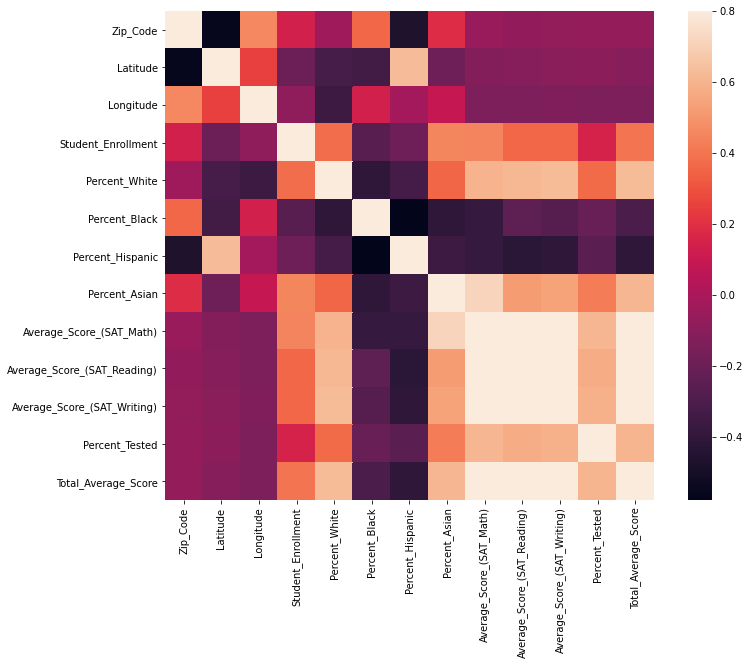

In [32]:
#correlation matrix
corrmat = df_scores.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


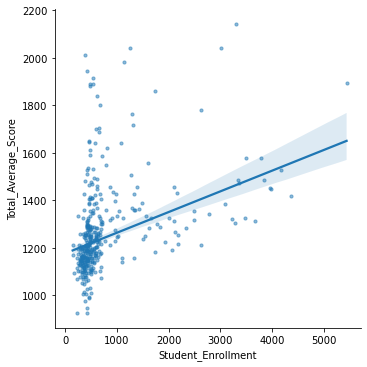

In [33]:
#plot Total Average Score Against Student Enrollment
sns.lmplot(data=df_scores, x='Student_Enrollment', y= 'Total_Average_Score',robust=True,
           scatter_kws={'s':10, 'alpha':0.5},
          x_jitter = .1)

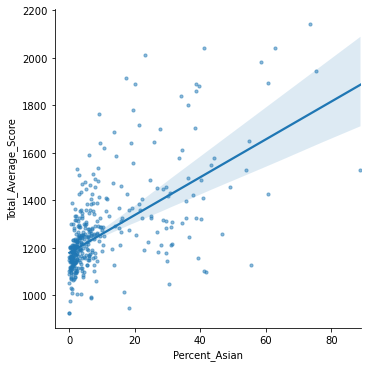

In [34]:
#plot Total Average Score Against Percent Asian
sns.lmplot(data=df_scores, x='Percent_Asian', y= 'Total_Average_Score',robust=True,
           scatter_kws={'s':10, 'alpha':0.5},
          x_jitter = .1)

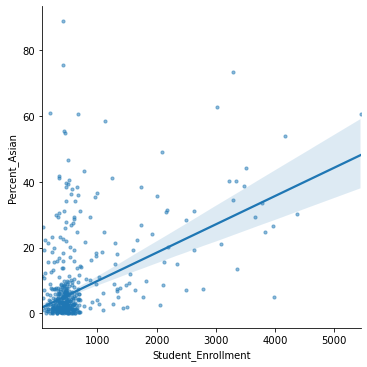

In [35]:
#plot Total Average Score Against Percent Asian
sns.lmplot(data=df_scores, x='Student_Enrollment', y= 'Percent_Asian', robust=True,
           scatter_kws={'s':10, 'alpha':0.5},
          x_jitter = .1)

In [36]:
#create new column with Total White Students in each school
df_scores['Total_White_Students'] = df_scores['Percent_White']/100 * df_scores['Student_Enrollment'] 

#create new column with Total Black Students in each school
df_scores['Total_Black_Students'] = df_scores['Percent_Black']/100 * df_scores['Student_Enrollment'] 

#create new column with Total Hispanic Students in each school
df_scores['Total_Hispanic_Students'] = df_scores['Percent_Hispanic']/100 * df_scores['Student_Enrollment'] 

#create new column with Total Asian Students in each school
df_scores['Total_Asian_Students'] = df_scores['Percent_Asian']/100 * df_scores['Student_Enrollment'] 


In [37]:
#round values to nearest whole number in column dataframe
df_scores['Total_White_Students'] = df_scores['Total_White_Students'].round(0)
df_scores['Total_Black_Students'] = df_scores['Total_Black_Students'].round(0)
df_scores['Total_Hispanic_Students'] = df_scores['Total_Hispanic_Students'].round(0)
df_scores['Total_Asian_Students'] = df_scores['Total_Asian_Students'].round(0)

df_scores.head()

,School_ID,School_Name,Borough,Building_Code,Street_Address,City,State,Zip_Code,Latitude,Longitude,Phone_Number,Start_Time,End_Time,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Average_Score_(SAT_Math),Average_Score_(SAT_Reading),Average_Score_(SAT_Writing),Percent_Tested,Total_Average_Score,Total_White_Students,Total_Black_Students,Total_Hispanic_Students,Total_Asian_Students
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,8:30 AM,3:00 PM,87.0,3.4,21.8,67.8,4.6,NaN,NaN,NaN,NaN,NaN,3.0,19.0,59.0,4.0
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0,1859.0,496.0,231.0,312.0,668.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,8:00 AM,2:45 PM,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9,1193.0,42.0,138.0,148.0,21.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,8:30 AM,3:00 PM,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1,1261.0,12.0,108.0,218.0,33.0


In [38]:
#add new column of total students that are white, black, hispanic or asian
Total_Students1 = df_scores['Total_White_Students'] + df_scores['Total_Black_Students'] + df_scores['Total_Hispanic_Students'] + df_scores['Total_Asian_Students']

#add new column of students that are not White, Black, Hispanic, or Asian
df_scores['Total_Students_(Other)'] = df_scores['Student_Enrollment'] - Total_Students1


In [39]:
df_scores.head()

,School_ID,School_Name,Borough,Building_Code,Street_Address,City,State,Zip_Code,Latitude,Longitude,Phone_Number,Start_Time,End_Time,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Average_Score_(SAT_Math),Average_Score_(SAT_Reading),Average_Score_(SAT_Writing),Percent_Tested,Total_Average_Score,Total_White_Students,Total_Black_Students,Total_Hispanic_Students,Total_Asian_Students,Total_Students_(Other)
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,8:30 AM,3:00 PM,87.0,3.4,21.8,67.8,4.6,NaN,NaN,NaN,NaN,NaN,3.0,19.0,59.0,4.0,2.0
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0,1859.0,496.0,231.0,312.0,668.0,28.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,8:00 AM,2:45 PM,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9,1193.0,42.0,138.0,148.0,21.0,9.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,8:30 AM,3:00 PM,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1,1261.0,12.0,108.0,218.0,33.0,12.0


In [40]:
#drop some unneeded columns for now
df_scores.drop(columns = ['School_ID', 'Building_Code', 'State', 'Start_Time', 'End_Time', 'Phone_Number'], inplace = True)
df_scores.head()

,School_Name,Borough,Street_Address,City,Zip_Code,Latitude,Longitude,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Average_Score_(SAT_Math),Average_Score_(SAT_Reading),Average_Score_(SAT_Writing),Percent_Tested,Total_Average_Score,Total_White_Students,Total_Black_Students,Total_Hispanic_Students,Total_Asian_Students,Total_Students_(Other)
0,Clinton School Writers and Artists,Manhattan,425 West 33rd Street,Manhattan,10001,40.75321,-73.99786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Inwood Early College for Health and Informatio...,Manhattan,650 Academy Street,Manhattan,10002,40.86605,-73.92486,87.0,3.4,21.8,67.8,4.6,NaN,NaN,NaN,NaN,NaN,3.0,19.0,59.0,4.0,2.0
2,"New Explorations into Science, Technology and ...",Manhattan,111 Columbia Street,Manhattan,10002,40.71873,-73.97943,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0,1859.0,496.0,231.0,312.0,668.0,28.0
3,Essex Street Academy,Manhattan,350 Grand Street,Manhattan,10002,40.71687,-73.98953,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9,1193.0,42.0,138.0,148.0,21.0,9.0
4,Lower Manhattan Arts Academy,Manhattan,350 Grand Street,Manhattan,10002,40.71687,-73.98953,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1,1261.0,12.0,108.0,218.0,33.0,12.0


In [41]:
#check new columns
df_scores.columns

Index(['School_Name', 'Borough', 'Street_Address', 'City', 'Zip_Code',
       'Latitude', 'Longitude', 'Student_Enrollment', 'Percent_White',
       'Percent_Black', 'Percent_Hispanic', 'Percent_Asian',
       'Average_Score_(SAT_Math)', 'Average_Score_(SAT_Reading)',
       'Average_Score_(SAT_Writing)', 'Percent_Tested', 'Total_Average_Score',
       'Total_White_Students', 'Total_Black_Students',
       'Total_Hispanic_Students', 'Total_Asian_Students',
       'Total_Students_(Other)'],
      dtype='object')

In [42]:
#create new dataframe with just total counts of student enrollment and ethnicities
df_pop = df_scores.drop(columns = [ 'Street_Address', 'City', 'Zip_Code',
                                   'Average_Score_(SAT_Math)','Average_Score_(SAT_Reading)', 
                                   'Average_Score_(SAT_Writing)', 'Total_Average_Score'])

In [43]:
df_pop.head()

,School_Name,Borough,Latitude,Longitude,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Percent_Tested,Total_White_Students,Total_Black_Students,Total_Hispanic_Students,Total_Asian_Students,Total_Students_(Other)
0,Clinton School Writers and Artists,Manhattan,40.75321,-73.99786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Inwood Early College for Health and Informatio...,Manhattan,40.86605,-73.92486,87.0,3.4,21.8,67.8,4.6,NaN,3.0,19.0,59.0,4.0,2.0
2,"New Explorations into Science, Technology and ...",Manhattan,40.71873,-73.97943,1735.0,28.6,13.3,18.0,38.5,91.0,496.0,231.0,312.0,668.0,28.0
3,Essex Street Academy,Manhattan,40.71687,-73.98953,358.0,11.7,38.5,41.3,5.9,78.9,42.0,138.0,148.0,21.0,9.0
4,Lower Manhattan Arts Academy,Manhattan,40.71687,-73.98953,383.0,3.1,28.2,56.9,8.6,65.1,12.0,108.0,218.0,33.0,12.0


In [44]:
#create variable total_student_enrollment to determine total population
total_student_enroll = df_pop['Student_Enrollment'].sum()
print("The total student enrollment in NYC High Schools is", total_student_enroll)

The total student enrollment in NYC High Schools is 300609.0


In [45]:
#similarly, calculate total enrollment for each ethnic population
total_white_enroll= df_pop['Total_White_Students'].sum()
print("The total white student enrollment in NYC High Schools is", total_white_enroll)

total_black_enroll= df_pop['Total_Black_Students'].sum()
print("The total black student enrollment in NYC High Schools is", total_black_enroll)

total_hispanic_enroll= df_pop['Total_Hispanic_Students'].sum()
print("The total hispanic student enrollment in NYC High Schools is", total_hispanic_enroll)

total_asian_enroll= df_pop['Total_Asian_Students'].sum()
print("The total asian student enrollment in NYC High Schools is", total_asian_enroll)

total_other_enroll= df_pop['Total_Students_(Other)'].sum()
print("The total other student enrollment in NYC High Schools is", total_other_enroll)

The total white student enrollment in NYC High Schools is 40601.0
The total black student enrollment in NYC High Schools is 85020.0
The total hispanic student enrollment in NYC High Schools is 118539.0
The total asian student enrollment in NYC High Schools is 50955.0
The total other student enrollment in NYC High Schools is 5494.0


In [46]:
#fill NaN values with N/A (Not Applicable)
#df_scores.fillna('N/A', inplace = True)
#df_scores.head()

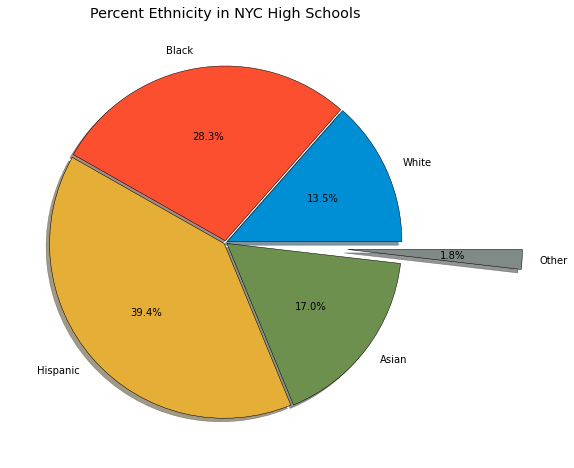

In [47]:
#plot piechart of percent ethnicities represented 
plt.style.use("ggplot")

fig = plt.gcf()
fig.set_size_inches(8,8)

slices = [total_white_enroll, total_black_enroll, total_hispanic_enroll, total_asian_enroll, total_other_enroll]
labels = ['White', 'Black', 'Hispanic', 'Asian', 'Other']
explode = [.01, .01, .01, .01, .7]
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#808a87']

plt.pie(slices, labels=labels, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Percent Ethnicity in NYC High Schools")
plt.tight_layout()
plt.show()


In [48]:
#mean percentage of students who tested for SAT
print("The mean percentage of NYC high schools who had taken the SAT in 2014-2015 was",df_scores.Percent_Tested.mean())

The mean percentage of NYC high schools who had taken the SAT in 2014-2015 was 63.34715025906737


In [49]:
#print mean percent tested for each borough group
df_scores.groupby('Borough').Percent_Tested.mean()

Borough
Bronx            55.958252
Brooklyn         60.228070
Manhattan        70.943333
Queens           69.036232
Staten Island    67.390000
Name: Percent_Tested, dtype: float64

In [50]:
#using agg function, find mean, max and min of % of borough schools who took SAT
df_scores.groupby('Borough').Percent_Tested.agg(['mean', 'max', 'min'])

,mean,max,min
Borough,,,
Bronx,55.958252,97.0,0.0
Brooklyn,60.228070,98.1,0.0
Manhattan,70.943333,100.0,30.6
Queens,69.036232,100.0,26.3
Staten Island,67.390000,99.7,38.0


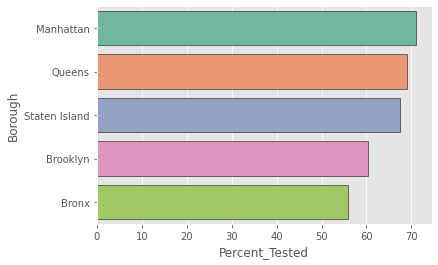

In [51]:
#plot percent tested against borough using seaborn
sns.barplot(x="Percent_Tested", y="Borough", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5',
            order = ['Manhattan', 'Queens', 'Staten Island', 'Brooklyn', 'Bronx'])
plt.show()

## Visualizing the data on a map of NYC

In [52]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [53]:
import folium
import json
from folium import plugins


nycArea = json.load(open('nyc-zip-code.geojson.txt', 'r'))

In [117]:
#initialize the map around NYC 
nycMap = folium.Map(location= [40.730610, -73.935242], width = '100%', height = '100%',
                    min_lat=40, max_lat=75, tiles='openstreetmap', zoom_start = 10)
        

#add the shape of NYC to the map
folium.GeoJson(nycArea).add_to(nycMap)

#for each row in the dataset, plot the corresponding latitude and longitude on the map
for i,row in df_scores.iterrows():
    folium.CircleMarker((row.Latitude,row.Longitude), radius=1.5, weight= 1.2, color='red', fill_color='red', fill_opacity=.5).add_to(nycMap)

nycMap


## Which Boroughs of NYC Had The Highest Average SAT Scores?

In [136]:
#initialize the map around NYC 
nycMap = folium.Map(location= [40.730610, -73.935242], width = '100%', height = '100%',
                    min_lat=40, max_lat=75, tiles='openstreetmap', zoom_start = 9.8)

#draw the choropleth map. These are the key components:
#geo_data = the geojson.txt file 
#data = df_scores dataframe
#threshold_scale = labels the color scale and divides values 
#columns = columns used in df. The first needs to line up with the key_on, second is the value used for determining the shading. 
#key_on = specifies which feature to use in the geoJSON file. The input for this always starts with "feature".

nycMap.choropleth(
    geo_data='nyc-zip-code.geojson.txt', 
    data=df_scores, 
    threshold_scale = [800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400],
    columns=['Borough', 'Total_Average_Score'],
    key_on='feature.properties.borough', 
    fill_color='YlGnBu', 
    fill_opacity=.8,
    line_opacity=1,
    legend_name = 'Total Average SAT Score')

for i,row in df_scores.iterrows():
    folium.CircleMarker((row.Latitude,row.Longitude), radius=1.5, weight= 1.2, color='red', fill_color='', fill_opacity=.5).add_to(nycMap)

nycMap